# Chapter3. 비지도 학습과 데이터 전처리

In [74]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

set_matplotlib_formats('retina')

In [4]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

----------------

# 3.3 데이터 전처리와 스케일 조정

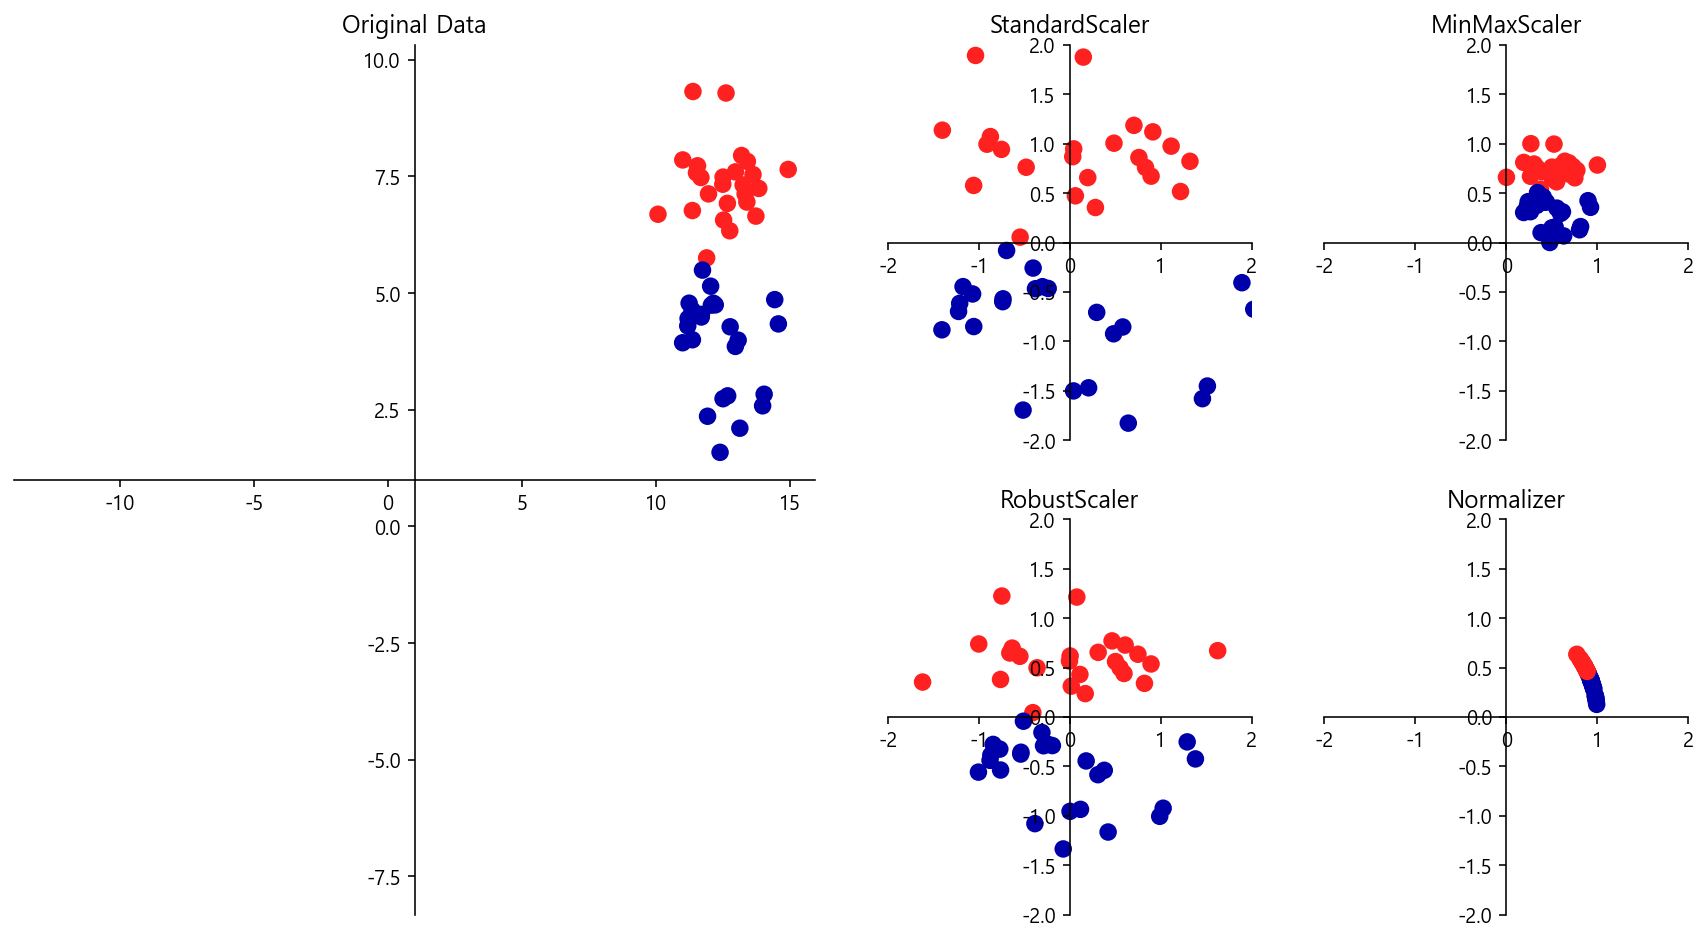

In [5]:
mglearn.plots.plot_scaling()

## 3.3.2 데이터 변환 적용하기

In [72]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train_scaled = scaler.transform(X_train)

print('변환된 후 크기 : ', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값 : \n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최대값 : \n', X_train.max(axis=0))

print('스케일 조정 후 특성별 최소값 : \n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값 : \n', X_train_scaled.max(axis=0))

변환된 후 크기 :  (426, 30)
스케일 조정 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## 3.3.3 QuantileTransformer와 PowerTransformer

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

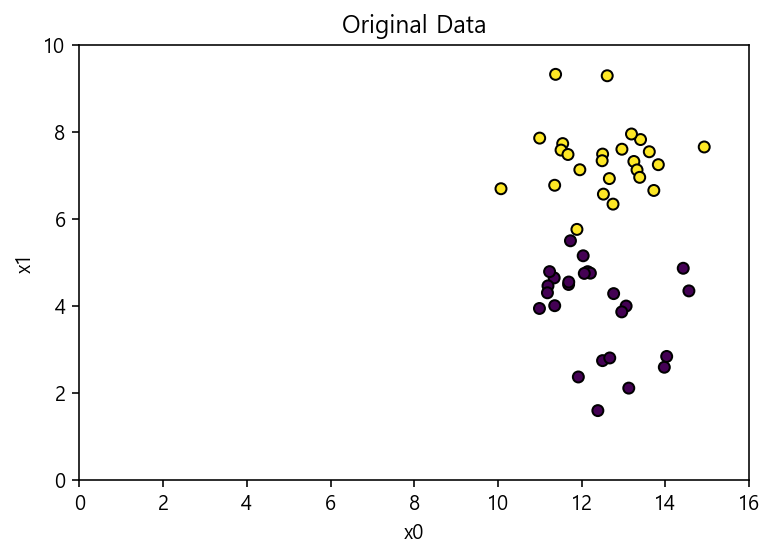

In [57]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X+=3

plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

#### QuantileTransformer 스케일링 적용

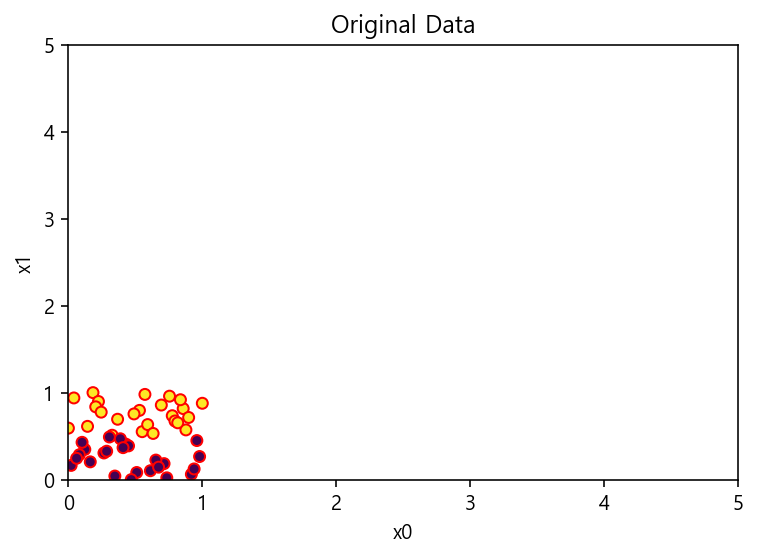

In [62]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='red')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

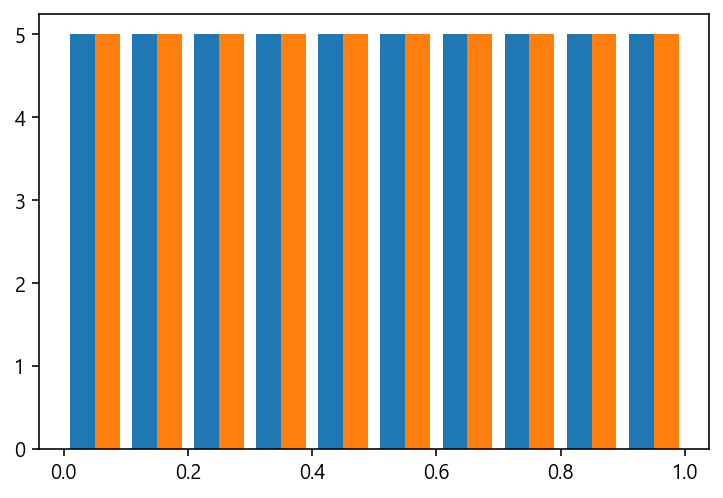

In [59]:
plt.hist(X_trans)
plt.show()

▶ 스케일링 결과, 모든 특성 값이 0과 1사이에 위치하고 있음을 알 수 있다.

In [60]:
print(scaler.quantiles_.shape)

(50, 2)


▶ 50분위수, 2개의 피처로 이루어져있음을 알 수 있다.

#### QuantileTransformer

In [78]:
x = np.array([[0], [5], [8], [9], [100]])
print(np.percentile(x[:,0], [0,25,50,75,100]))

[  0.   5.   8.   9. 100.]


In [79]:
x_trans = QuantileTransformer().fit_transform(x)

print(np.percentile(x_trans[:,0], [0, 25,50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


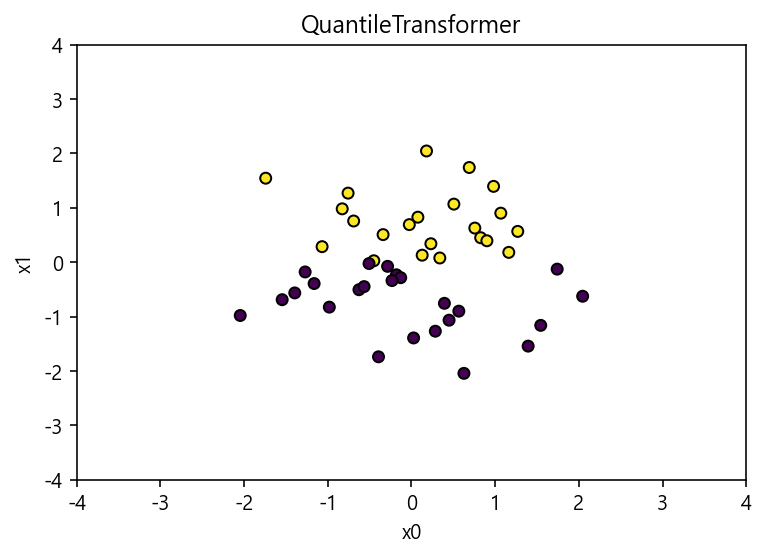

In [82]:
scaler = QuantileTransformer(output_distribution = 'normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(-4,4)
plt.xlabel('x0')
plt.ylim(-4,4)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

#### 각 scaler별 변환 차이 관찰

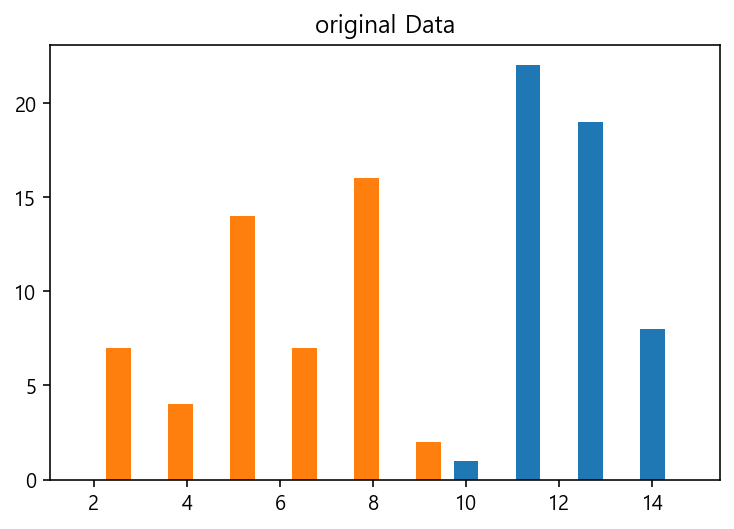

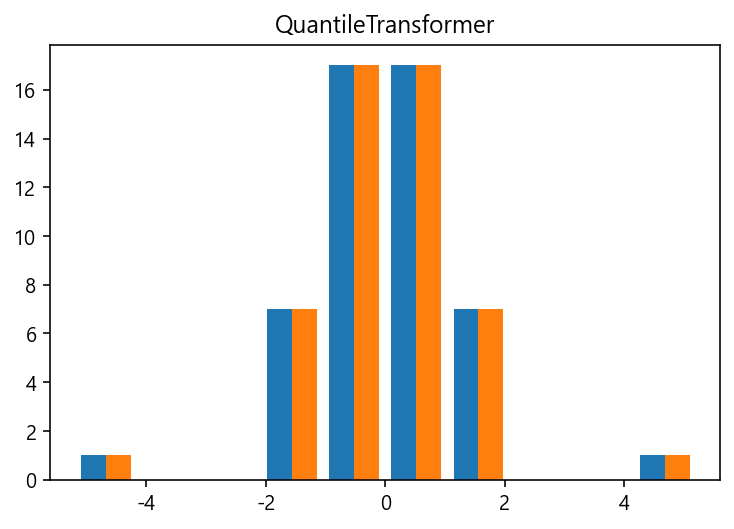

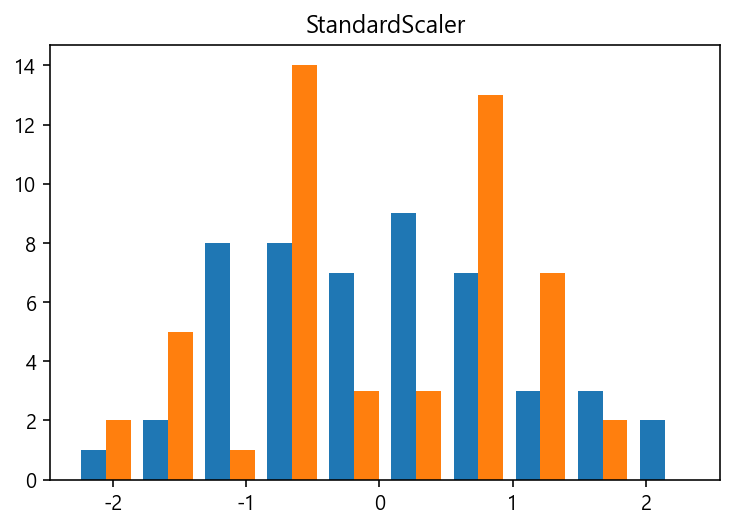

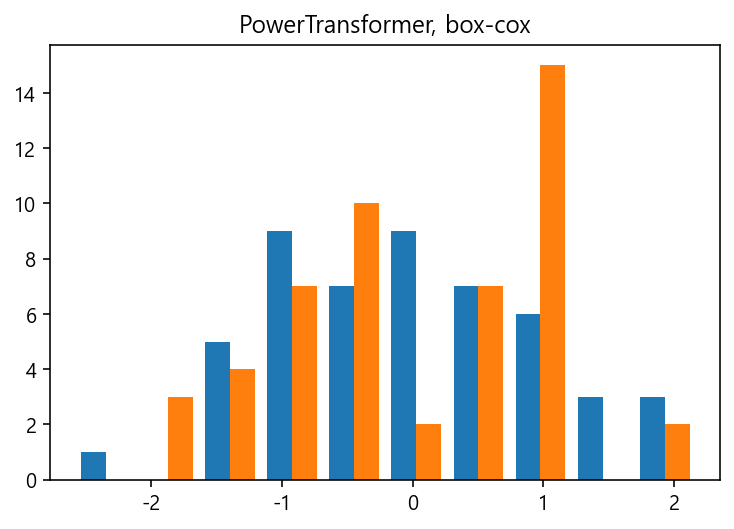

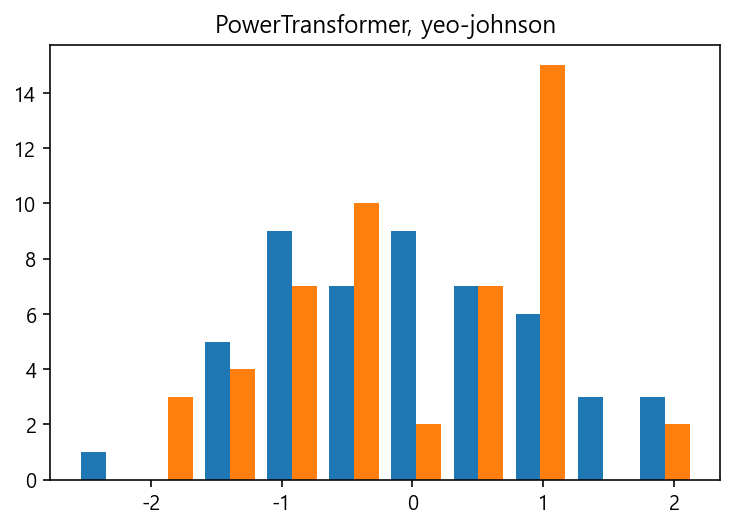

In [84]:
plt.hist(X)
plt.title('original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer, box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer, yeo-johnson')
plt.show()

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

In [89]:
from sklearn.datasets import make_blobs

In [108]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

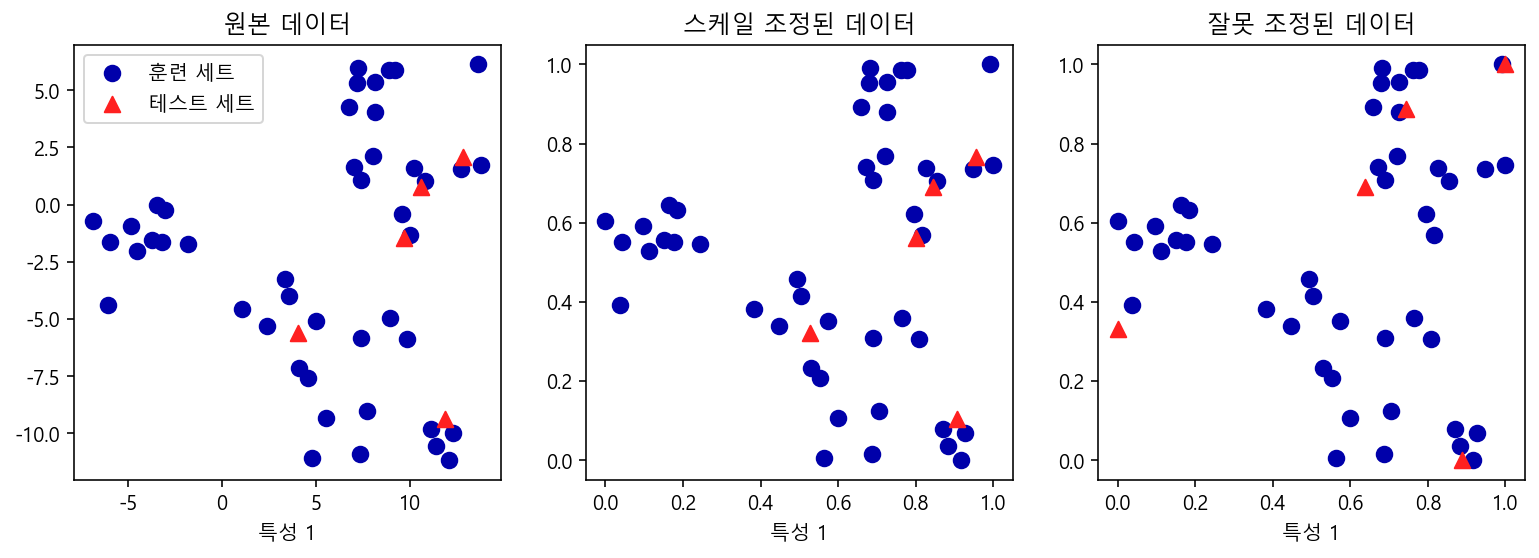

In [116]:
fig, axes = plt.subplots(1,3, figsize=(13,4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2.colors[0], label='훈련 세트',s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], c=mglearn.cm2.colors[1],marker='^', label='테스트 세트',s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('원본 데이터')

# 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0], label='훈련 세트',s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=mglearn.cm2.colors[1],marker='^', label='테스트 세트',s=60)
# axes[1].legend(loc='upper left')
axes[1].set_title('스케일 조정된 데이터')

# 
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
# X_train_scaled = scaler.transform(X_train)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0], label='훈련 세트',s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], c=mglearn.cm2.colors[1],marker='^', label='테스트 세트',s=60)
# axes[1].legend(loc='upper left')
axes[2].set_title('잘못 조정된 데이터')

for ax in axes:
    ax.set_xlabel('특성 0')
    ax.set_xlabel('특성 1')

## 3.3.5 지도 학습에서 데이터 전처리 효과

In [119]:
from sklearn.svm import SVC

#### 스케일 전

In [120]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)

print('테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test,y_test)))

#  원래 0.63이 나와야하는데 94가 나오냐 왜..

테스트 세트 정확도 : 0.94


#### 스케일 후

In [121]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('스케일 조정된 테스트 세트의 정확도 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


▶ 정확도 상승

In [126]:
#  다른 스케일러 적용

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('스케일 조정된 테스트 세트의 정확도 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.96


# 3.4 차원 축소, 특성 추출, 매니폴드 학습

In [140]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

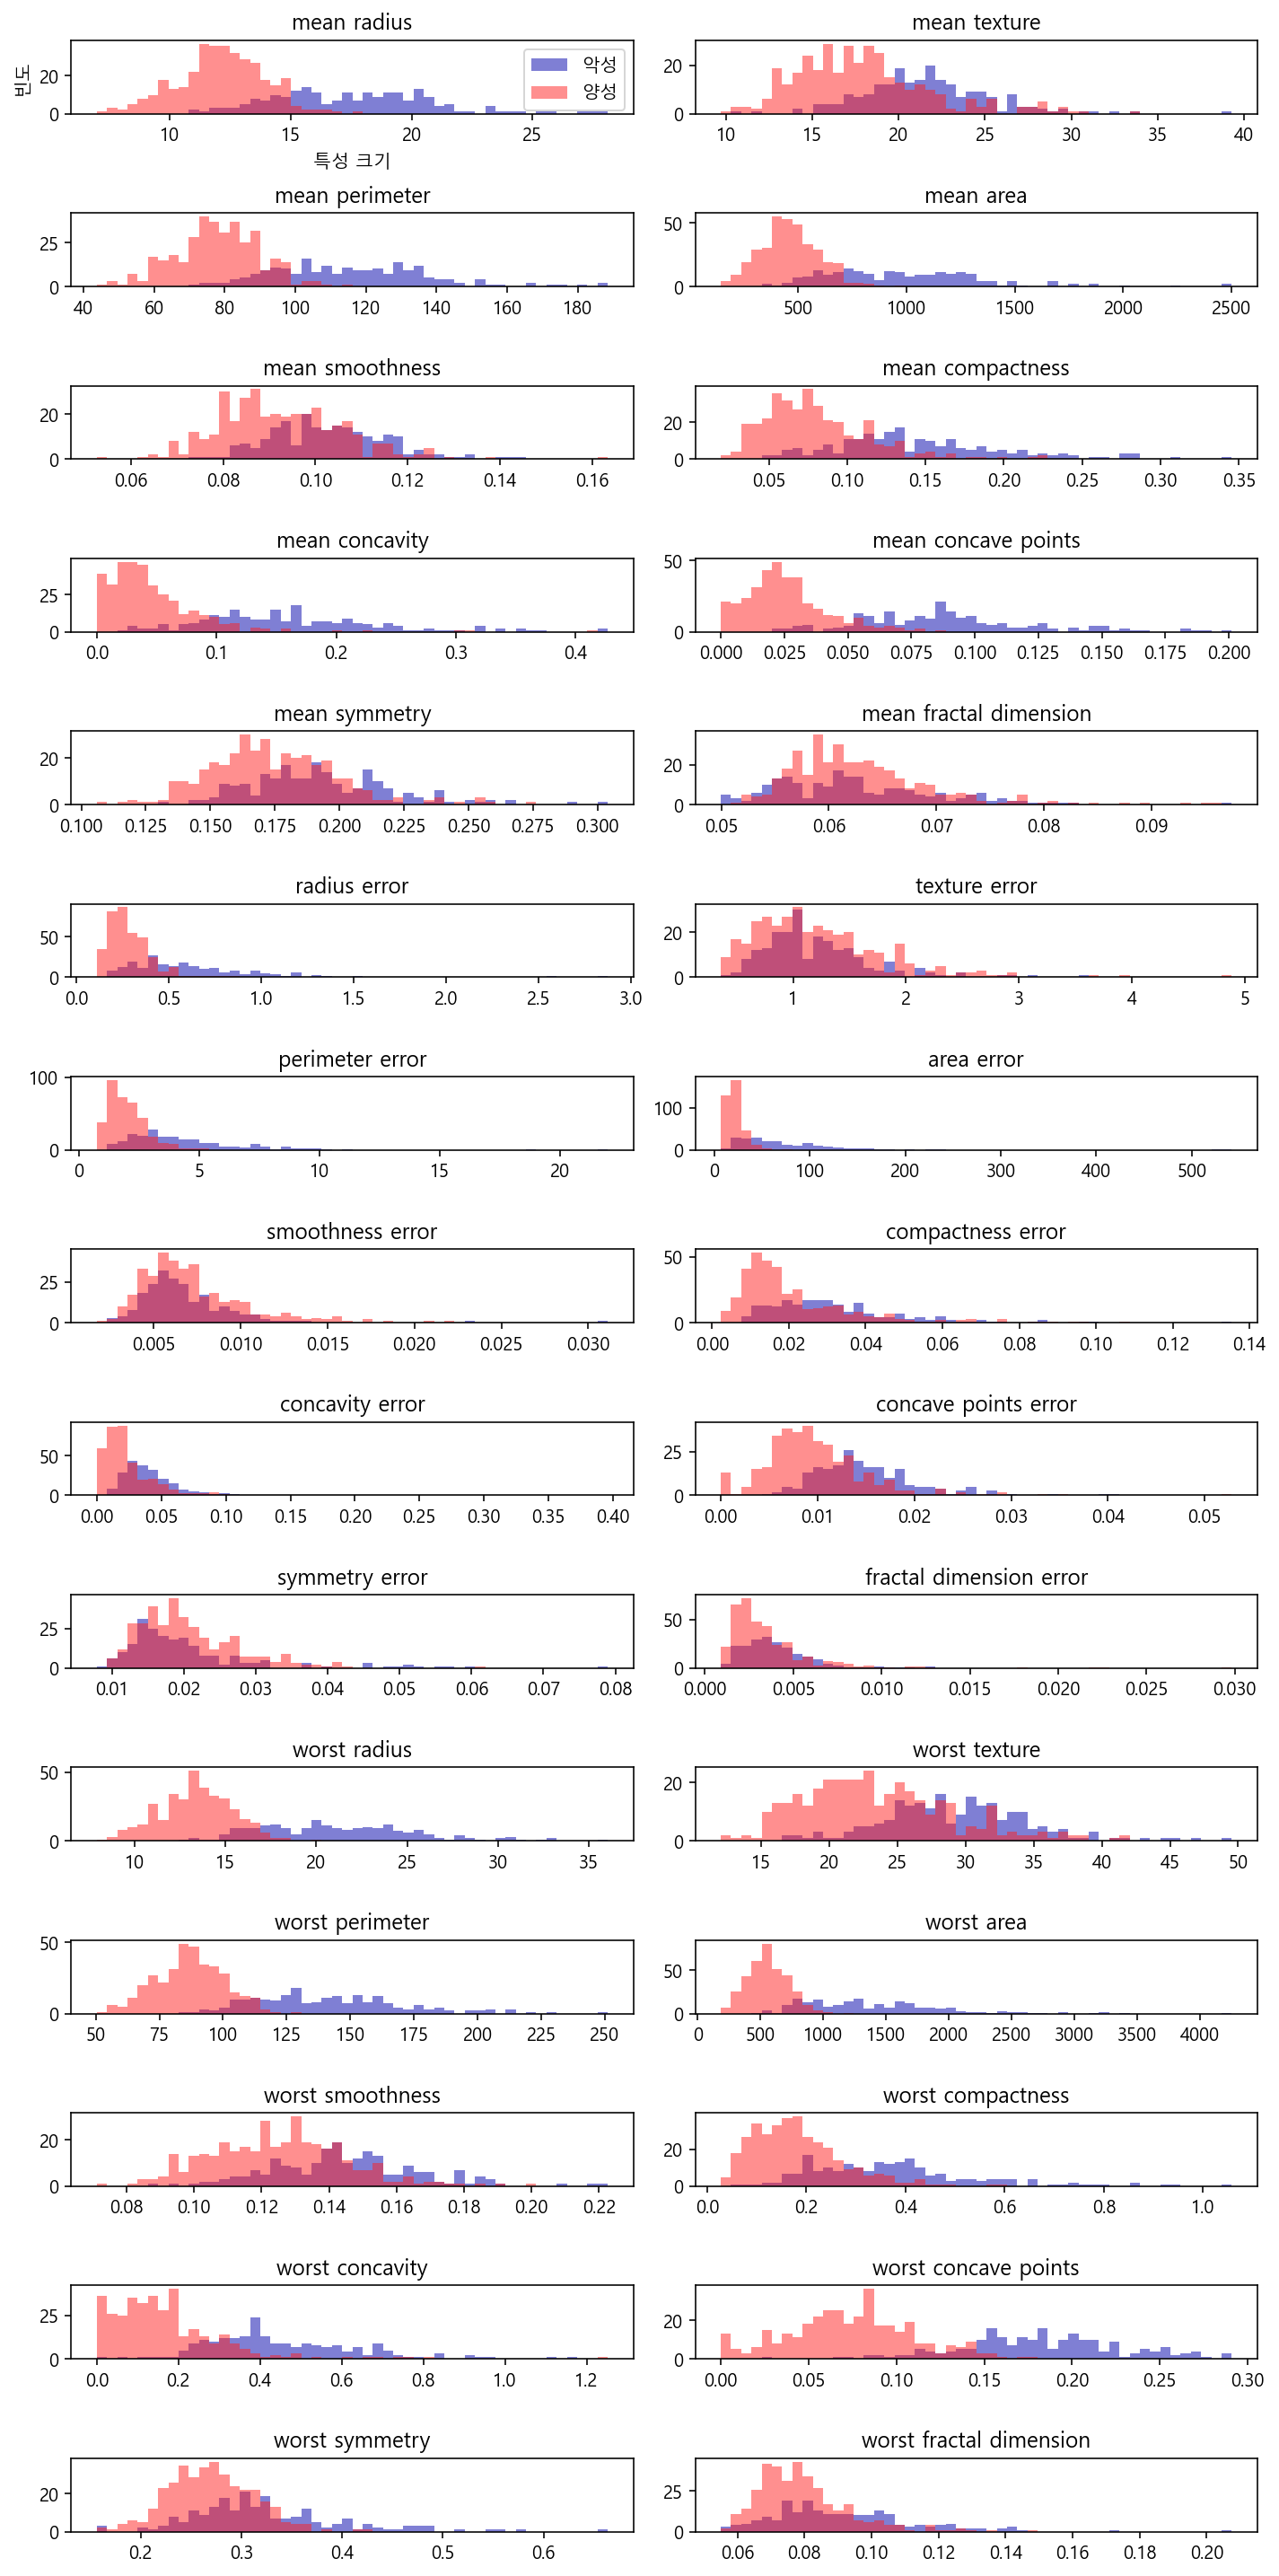

In [145]:
fig, axes = plt.subplots(15,2, figsize=(10,20))

malignant = cancer.data[cancer['target']==0]
begin = cancer.data[cancer['target']==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(begin[:,i], bins=bins, color=mglearn.cm3(1), alpha=0.5)
    
    ax[i].set_title(cancer.feature_names[i])
#     ax[i].set_yticks(())

ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성','양성'], loc='best')
fig.tight_layout()

In [149]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [150]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 데이터의 처음 두 개 주성분만 유지 시킨다.
pca.fit(X_scaled)   #유방암 데이터로 PCA모델을 생성

X_pca = pca.transform(X_scaled)

print('원본 데이터 형태 : ',str(X_scaled.shape))
print('축소된 데이터 형태 : ', str(X_pca.shape))

원본 데이터 형태 :  (569, 30)
축소된 데이터 형태 :  (569, 2)


Text(0.5, 0, '두 번째 주성분')

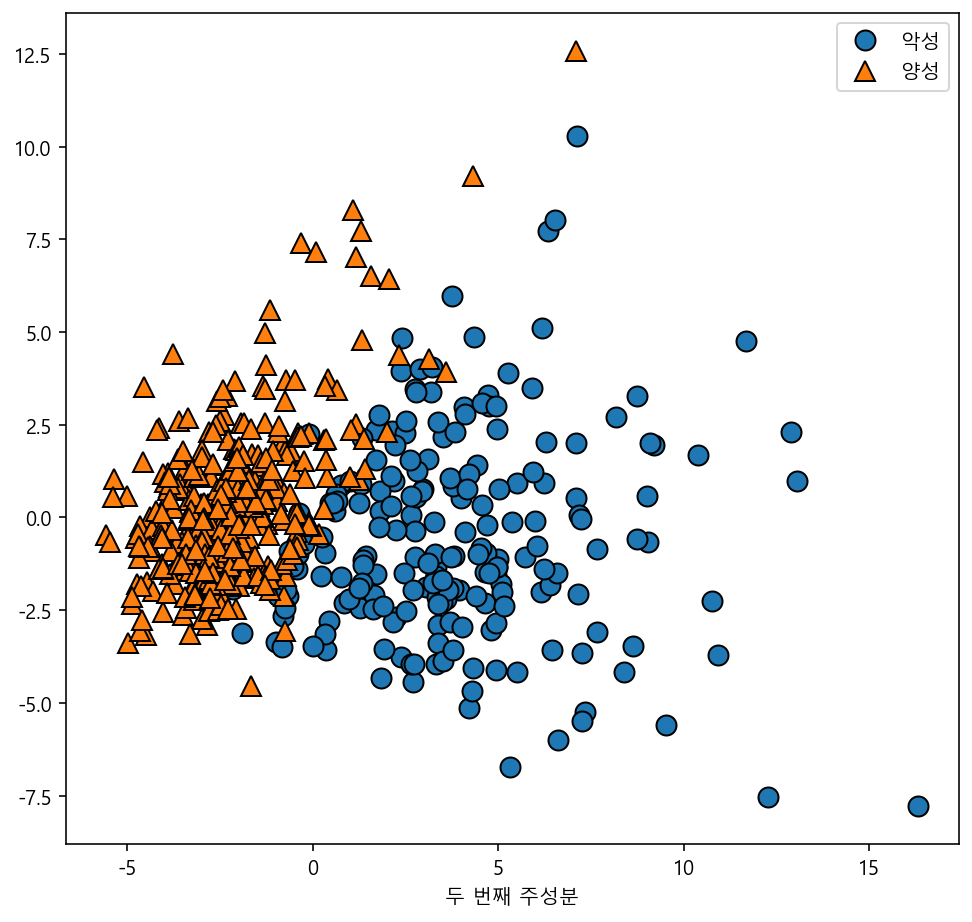

In [153]:
plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.xlabel('두 번째 주성분')

Text(0.5, 0, '두 번째 주성분')

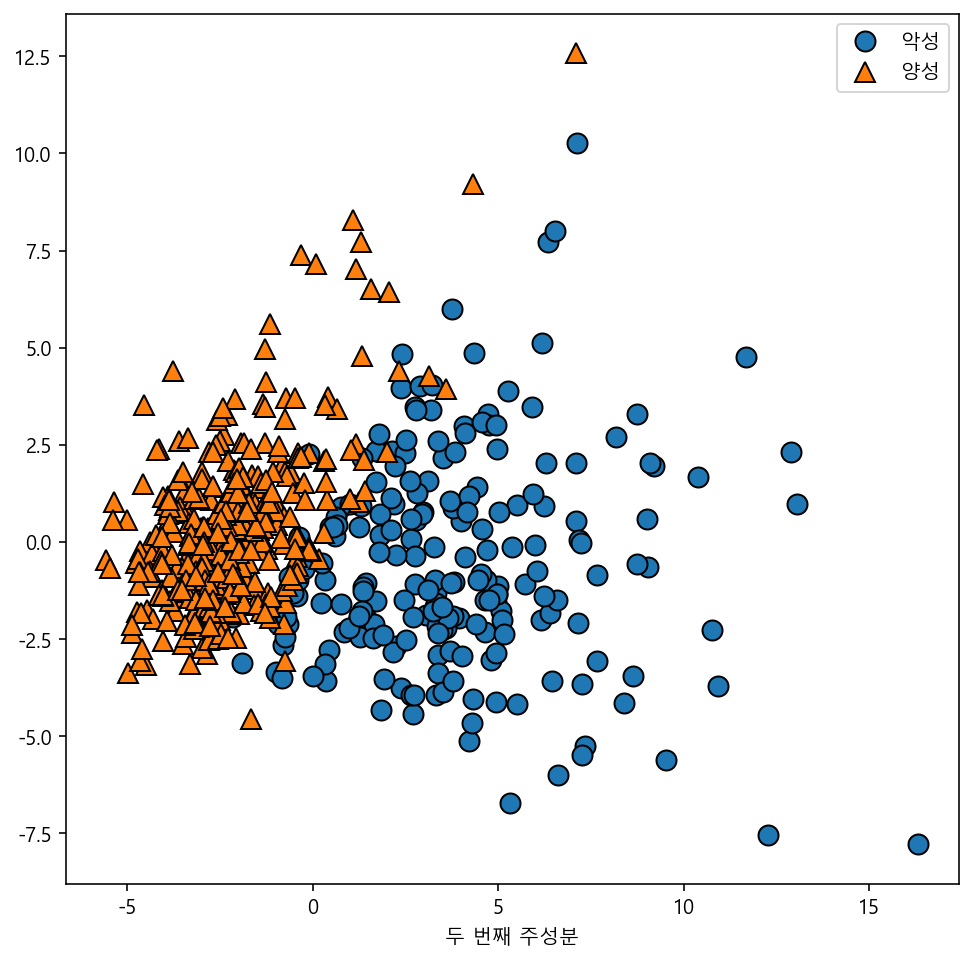

In [154]:
plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
# plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.xlabel('두 번째 주성분')

In [156]:
print('PCA 주성분 형태 : ',pca.components_.shape)

PCA 주성분 형태 :  (2, 30)


In [157]:
print('PCA 주성분 : ',pca.components_)

PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

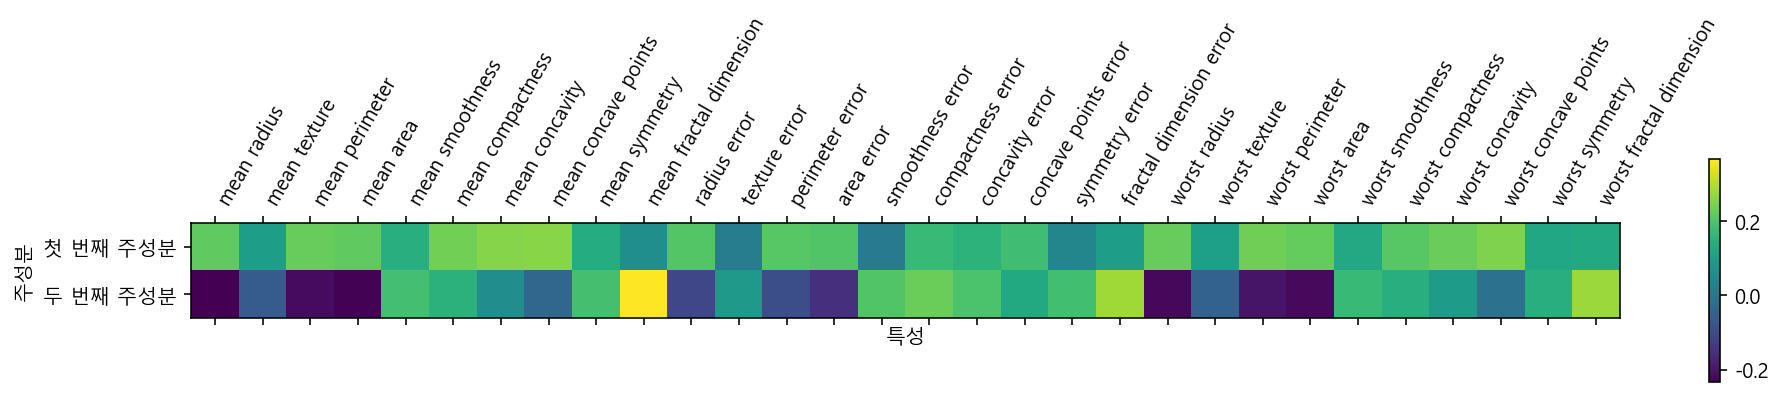

In [158]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')

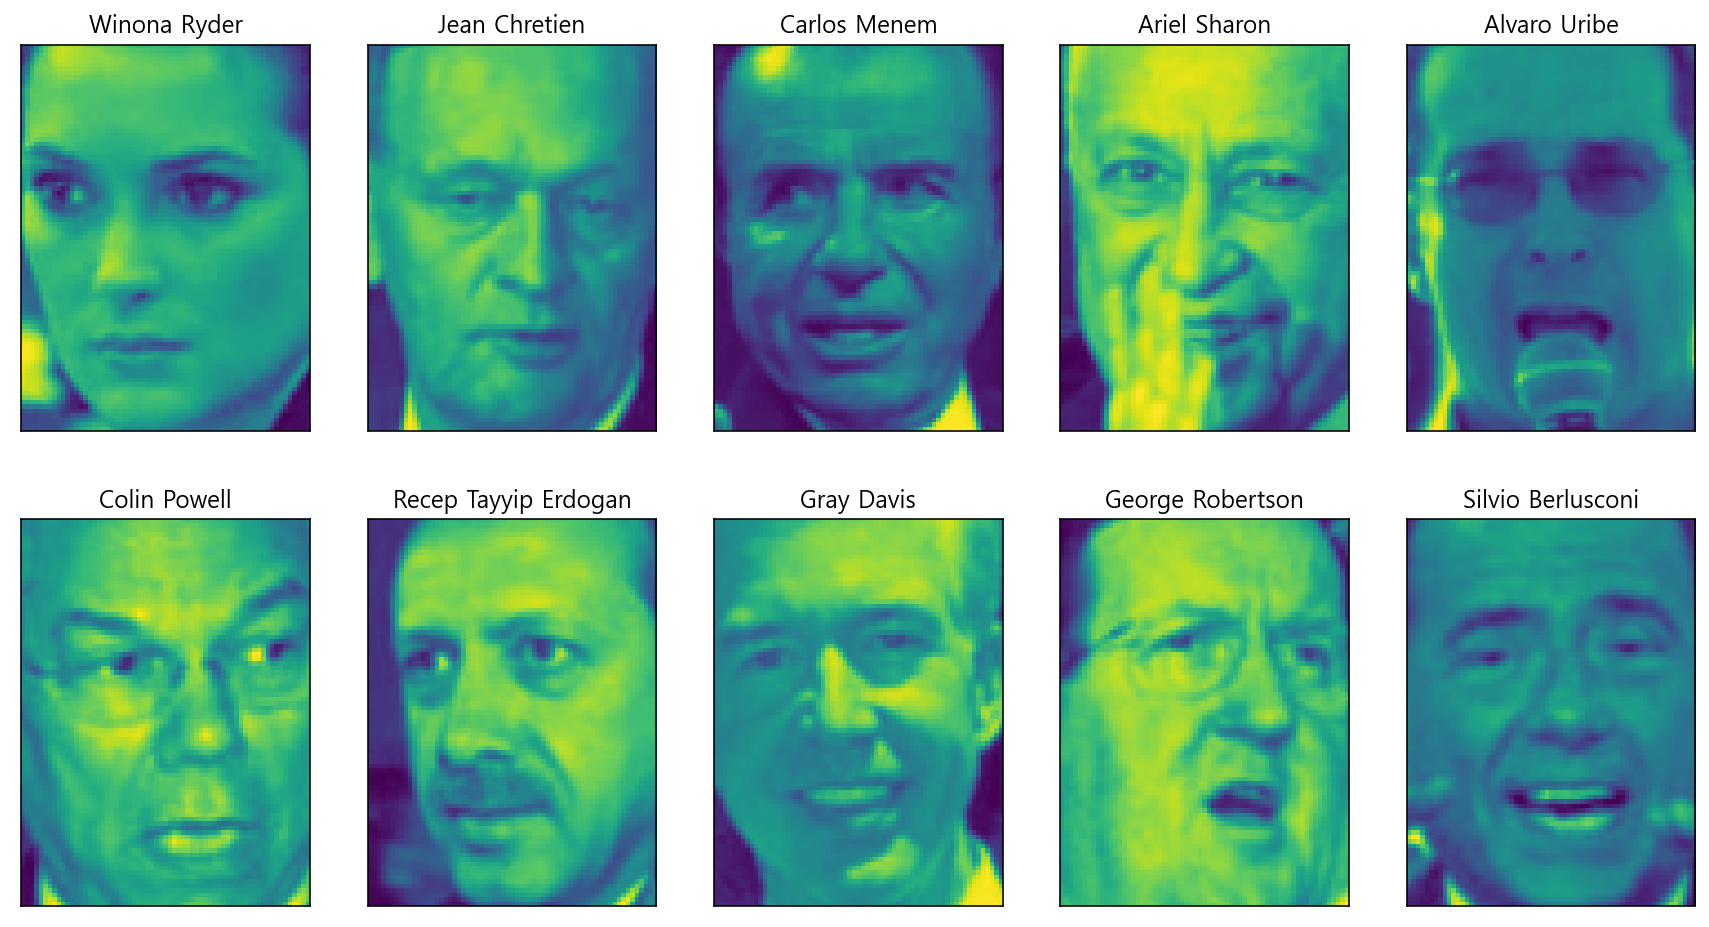

In [163]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [170]:
print('people.images.shape : ', people.images.shape)
print('클래스 개수 : ', len(people.target_names))

people.images.shape :  (3023, 87, 65)
클래스 개수 :  62


In [ ]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)) :
    print('{0:25}')